<br>

# Python Project: An Online Retail Business
Ziqi Polimeros<br>
2/24/2022

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

Data source：
https://www.kaggle.com/gabrielramos87/an-online-shop-business

## Introduction

E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.


This is a dataset of UK-based B2C e-commerce sales transactions for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.
The dataset contains 500K rows and 8 columns. The following is the description of each column.

- TransactionNo (nominal): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- Date (numeric): the date when each transaction was generated.
- ProductNo (nominal): a five or six-digit unique character used to identify a specific product.
- Product (nominal): product/item name.
- Price (numeric): the price of each product per unit in pound sterling (£).
- Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- CustomerNo (nominal): a five-digit unique number that defines each customer.
- Country (nominal): name of the country where the customer resides.

## Analysis 1: Load the dataset


In [2]:
sales = pd.read_csv("Business Sales Transaction.csv")


In [3]:
# change the date type of 'Date' column, seperate them to 'Year' column and 'Month' column
sales["Date"] = pd.to_datetime(sales["Date"])
sales["Year"] = pd.DatetimeIndex(sales["Date"]).year
sales["Month"] = pd.DatetimeIndex(sales["Date"]).month
 

# convert "CustomerNo" to factor
sales["CustomerNo"] = sales['CustomerNo'].astype('category')
sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
0,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,383.40,13069.0,United Kingdom,2019,12
1,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,138.36,13069.0,United Kingdom,2019,12
2,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,127.80,13069.0,United Kingdom,2019,12
3,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,71.64,13069.0,United Kingdom,2019,12
4,581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,255.60,13069.0,United Kingdom,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22631,Circus Parade Lunch Box,12.25,-1,-12.25,12472.0,Germany,2018,12
536346,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,-37.92,12472.0,Germany,2018,12
536347,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,-42.27,12472.0,Germany,2018,12
536348,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,-11.74,12472.0,Germany,2018,12


## Analysis 2:  Overview 

In [4]:
# calculate the overview of the dataset
overview = pd.DataFrame(columns = ["sum","mean","median","max","min"])
overview = pd.DataFrame(sales['Revenue'].agg(["sum","mean","median","max","min"]).round(2))
overview["Quantity"] = sales['Quantity'].agg(["sum","mean","median","max","min"]).round(0) 
overview["Summary"] = ["sum","mean","median","max","min"]
overview["Revenue"] = overview["Revenue"]/1000000
overview["Quantity"] = overview["Quantity"]/1000000
overview

,Revenue,Quantity,Summary
sum,64.556040,5.320242,sum
mean,0.000120,0.000010,mean
median,0.000046,0.000003,median
max,1.002718,0.080995,max
min,-1.002718,-0.080995,min


In [5]:
# sum of revenue and product quantities
overview2 = pd.DataFrame({"info":["Sales Revenue (In Million Pounds Sterling)", 
                                  "Product Quantities(In Million)"],
                          "Total":[sales['Revenue'].sum()/1000000,
                                   sales['Quantity'].sum()/1000000]})
overview2

,info,Total
0,Sales Revenue (In Million Pounds Sterling),64.556040
1,Product Quantities(In Million),5.320242


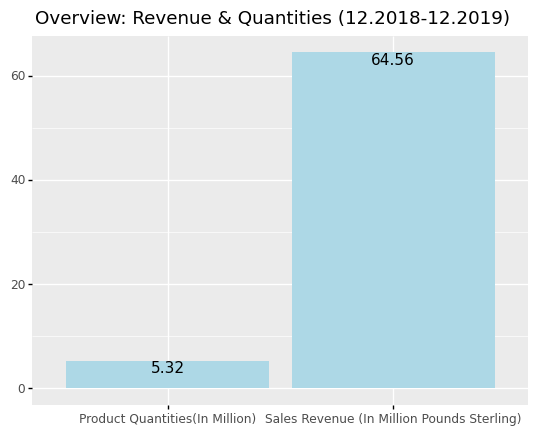

<ggplot: (127481224084)>

In [6]:
(ggplot(overview2)
 + aes("info", "Total",label = "round(Total,2)") 
 + geom_col(fill = "lightblue")
 + geom_text(va = "top")
 + labs(x = "",
        y = "",
        title = "Overview: Revenue & Quantities (12.2018-12.2019)")
)

In [8]:
# sum of customers and product ID
overview_c_p = pd.DataFrame({"Info":["Customers","Product IDs","Countries"],
                             "Quantity":[len(sales["CustomerNo"].unique()), 
                                   len(sales["ProductNo"].unique()),
                                   len(sales["Country"].unique())]})

In [184]:
overview_c_p

,Info,Quantity
0,Customers,4739
1,Product IDs,3768
2,Countries,38


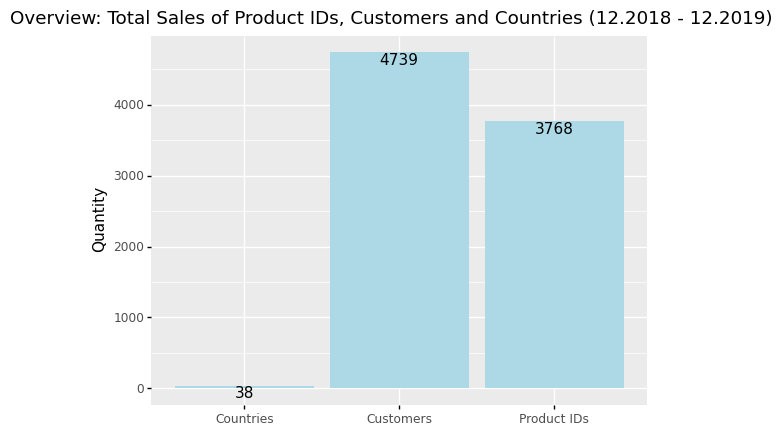

<ggplot: (147939358124)>

In [9]:
(ggplot(overview_c_p)
 + aes(x = "Info", y = "Quantity", label = "Quantity")
 + geom_col(fill = "lightblue")
 + geom_text(va = "top")
 + labs(x = "",
        title = "Overview: Total Sales of Product IDs, Customers and Countries (12.2018 - 12.2019)")
)

## Analysis 3:  Monthly Revenue

In [18]:
# calculate total sales by each month
revenue = sales.groupby(["Year","Month","Country"]).sum()["Revenue"].reset_index()

# read 'Countries' dataset
countries = pd.read_csv("Countries.csv")

# join countries dataset
revenue = pd.merge(revenue,countries, on = "Country", how = "left")
revenue

,Year,Month,Country,Revenue,No,CountryCode,M49 Code,Region 1,Region 2,Continent
0,2018,12,Australia,5683.41,14.0,AUS,36.0,Australia and New Zealand,NaN,Oceania
1,2018,12,Austria,-512.64,15.0,AUT,40.0,Western Europe,NaN,Europe
2,2018,12,Belgium,42831.07,22.0,BEL,56.0,Western Europe,NaN,Europe
3,2018,12,Cyprus,11681.98,61.0,CYP,196.0,Western Asia,NaN,Asia
4,2018,12,Denmark,5736.86,65.0,DNK,208.0,Northern Europe,NaN,Europe
...,...,...,...,...,...,...,...,...,...,...
297,2019,12,Portugal,18377.48,177.0,PRT,620.0,Southern Europe,NaN,Europe
298,2019,12,Spain,2863.26,211.0,ESP,724.0,Southern Europe,NaN,Europe
299,2019,12,Sweden,0.00,217.0,SWE,752.0,Northern Europe,NaN,Europe
300,2019,12,United Kingdom,2487586.64,235.0,GBR,826.0,Northern Europe,NaN,Europe


In [11]:
# combine "Year" and "Month" to one column, "Date"
revenue["Date"] = revenue[["Year","Month"]].astype(str).agg(".".join,axis = 1)
revenue["Date"] = pd.to_datetime(revenue["Date"])

# convert the unit of "Revenue" to million pound sterlings
revenue["Revenue"] = revenue['Revenue']/1000000

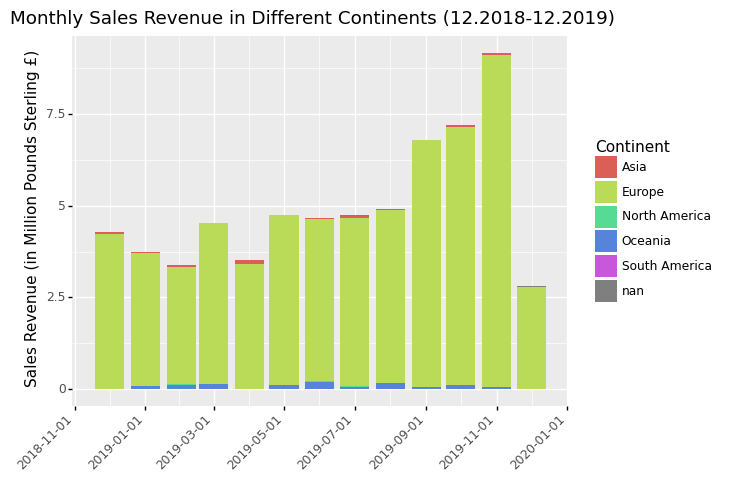

<ggplot: (147939400162)>

In [12]:
# graph monthly sales
( ggplot(revenue)
   + aes(x = "Date",
         y = "Revenue",
         fill = "Continent")
   + geom_col( )
   + theme(axis_text_x=element_text(rotation=45, hjust=1))
   + labs( x = "",
           y = "Sales Revenue (in Million Pounds Sterling £)",
           title = "Monthly Sales Revenue in Different Continents (12.2018-12.2019)")
)

## Analysis 4: Products


#### Products: Top 20 Best Seller

In [3]:
# create product dataframe to analyse sales for each products.
product = sales.groupby(["ProductNo","ProductName","Country"]).sum().reset_index()
product["Price"] = product["Revenue"]/product["Quantity"]
product

,ProductNo,ProductName,Country,Price,Quantity,Revenue,CustomerNo
0,10002,Inflatable Political Globe,Belgium,11.950000,2,23.90,12876.0
1,10002,Inflatable Political Globe,EIRE,11.120000,12,133.44,14911.0
2,10002,Inflatable Political Globe,France,11.120000,372,4136.64,101458.0
3,10002,Inflatable Political Globe,Germany,11.673333,3,35.02,25197.0
4,10002,Inflatable Political Globe,Japan,11.120000,1,11.12,12754.0
...,...,...,...,...,...,...,...
22339,90214V,"Letter ""V"" Bling Key Ring",United Kingdom,10.880769,26,282.90,203521.0
22340,90214W,"Letter ""W"" Bling Key Ring",United Kingdom,10.688750,16,171.02,77372.0
22341,90214Y,"Letter ""Y"" Bling Key Ring",Belgium,11.120000,1,11.12,12876.0
22342,90214Y,"Letter ""Y"" Bling Key Ring",United Kingdom,10.599231,65,688.95,107273.0


In [53]:
# choose the top 20 products
product = product.sort_values(by = ['Revenue'],ascending = False)
names = product["ProductName"][:20]

# create a new dataframe
product_20 = pd.DataFrame(columns = product.columns.values)
 

In [54]:
# the top 20 marketable products
for n in names:
    product_20 = product_20.append(product[product["ProductName"] == n])
product_20    

C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

,ProductNo,ProductName,Country,Price,Quantity,Revenue,Year,Month
6847,22197,Popcorn Holder,United Kingdom,11.182864,52821,590690.05,2729570,10515
6835,22197,Popcorn Holder,EIRE,11.047171,1785,19719.2,78738,324
6842,22197,Popcorn Holder,Norway,11.032162,444,4898.28,10093,56
6836,22197,Popcorn Holder,France,11.194036,389,4354.48,62587,231
6844,22197,Popcorn Holder,Singapore,10.99,300,3297.0,6057,15
...,...,...,...,...,...,...,...,...
21197,85099F,Jumbo Bag Strawberry,Portugal,12.863333,36,463.08,8076,25
21193,85099F,Jumbo Bag Strawberry,EIRE,12.290625,32,393.3,8076,15
21198,85099F,Jumbo Bag Strawberry,Switzerland,12.293333,30,368.8,4038,12
21192,85099F,Jumbo Bag Strawberry,Cyprus,12.38,10,123.8,2019,10


In [55]:
# covert the revenue in million pounds sterling
product_20['Revenue'] = product_20["Revenue"]/1000000

# combine product_20 dataframe with countries dataframe
product_20 = pd.merge(product_20,countries, on = "Country", how = "left")
product_20


,ProductNo,ProductName,Country,Price,Quantity,Revenue,Year,Month,No,CountryCode,M49 Code,Region 1,Region 2,Continent
0,22197,Popcorn Holder,United Kingdom,11.182864,52821,0.59069,2729570,10515,235.0,GBR,826.0,Northern Europe,NaN,Europe
1,22197,Popcorn Holder,EIRE,11.047171,1785,0.019719,78738,324,NaN,NaN,NaN,NaN,NaN,Europe
2,22197,Popcorn Holder,Norway,11.032162,444,0.004898,10093,56,166.0,NOR,578.0,Northern Europe,NaN,Europe
3,22197,Popcorn Holder,France,11.194036,389,0.004354,62587,231,81.0,FRA,250.0,Western Europe,NaN,Europe
4,22197,Popcorn Holder,Singapore,10.99,300,0.003297,6057,15,202.0,SGP,702.0,South-eastern Asia,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,85099F,Jumbo Bag Strawberry,Portugal,12.863333,36,0.000463,8076,25,177.0,PRT,620.0,Southern Europe,NaN,Europe
318,85099F,Jumbo Bag Strawberry,EIRE,12.290625,32,0.000393,8076,15,NaN,NaN,NaN,NaN,NaN,Europe
319,85099F,Jumbo Bag Strawberry,Switzerland,12.293333,30,0.000369,4038,12,218.0,CHE,756.0,Western Europe,NaN,Europe
320,85099F,Jumbo Bag Strawberry,Cyprus,12.38,10,0.000124,2019,10,61.0,CYP,196.0,Western Asia,NaN,Asia


In [60]:
# Sum the value of revenue
product_20 = product_20[["ProductName","Continent","Revenue"]].groupby(["ProductName","Continent"]).sum().reset_index()
product_20

,ProductName,Continent,Revenue
0,Antique Silver T-Light Glass,Asia,0.000138
1,Antique Silver T-Light Glass,Europe,0.219864
2,Assorted Colour Bird Ornament,Asia,0.000575
3,Assorted Colour Bird Ornament,Europe,0.433171
4,Assorted Colour Bird Ornament,North America,0.000096
...,...,...,...
62,Victorian Glass Hanging T-Light,Europe,0.277387
63,Victorian Glass Hanging T-Light,North America,0.000277
64,World War 2 Gliders Asstd Designs,Asia,0.006041
65,World War 2 Gliders Asstd Designs,Europe,0.555964


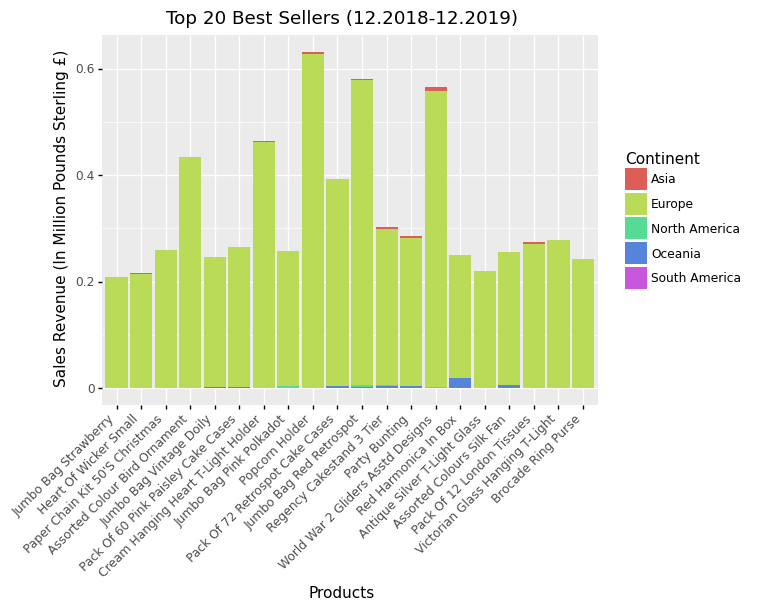

<ggplot: (127482946591)>

In [61]:
# Top 20 best sellers
(ggplot(data = product_20,
        mapping = aes(y = 'Revenue', x = "reorder(ProductName,Revenue)", fill = "Continent"))
 + geom_col()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs( x = "Products",
         y = "Sales Revenue (In Million Pounds Sterling £)",
         title = "Top 20 Best Sellers (12.2018-12.2019)")

)

#### Return Products

In [63]:
# filter Revenue smaller than zero and calculate return products
product_return = sales[sales["Revenue"] < 0].groupby(["ProductName","Country"]).sum().sort_values(by = ['Revenue'],ascending = True).reset_index()

In [64]:
#choose product name of top 20 return products 
r_names = product_return["ProductName"][:20]

# create a new dataframe 
product_return20 = pd.DataFrame(columns = product_return.columns.values)
product_return20

,ProductName,Country,Price,Quantity,Revenue,Year,Month


In [65]:
# add 20 biggest return products
for n in r_names:
    product_return20 = product_return20.append(product_return[product_return["ProductName"] == n])
    
product_return20

C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_45396/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,ProductName,Country,Price,Quantity,Revenue,Year,Month
0,Paper Craft Little Birdie,United Kingdom,12.38,-80995,-1002718.1,2019,12
1,Medium Ceramic Top Storage Jar,United Kingdom,68.55,-74467,-842967.07,12114,39
1176,Medium Ceramic Top Storage Jar,EIRE,11.53,-12,-138.36,2019,8
1179,Medium Ceramic Top Storage Jar,United States,11.53,-12,-138.36,2019,10
2253,Medium Ceramic Top Storage Jar,Switzerland,11.32,-2,-22.64,2019,9
2638,Medium Ceramic Top Storage Jar,Australia,11.53,-1,-11.53,2019,7
2,Rotating Silver Angels T-Light Hldr,United Kingdom,23.14,-9361,-96233.66,4037,22
1621,Rotating Silver Angels T-Light Hldr,EIRE,12.86,-6,-77.16,2019,1
3,Fairy Cake Flannel Assorted Colour,United Kingdom,35.86,-3150,-39035.88,6057,27
4,Cream Hanging Heart T-Light Holder,United Kingdom,524.65,-2551,-32846.45,80755,259


In [66]:
# convert the return revenue in million pounds sterling
product_return20["Revenue"] = product_return20["Revenue"]/1000000

product_return20 = product_return20.groupby(["ProductName","Country"]).sum().reset_index()
product_return20

,ProductName,Country,Price,Quantity,Revenue,Year,Month
0,Coloured Glass Star T-Light Holder,EIRE,42.18,-5,-0.000071,6056,34
1,Coloured Glass Star T-Light Holder,United Kingdom,381.74,-1223,-0.016047,56530,223
2,Cream Hanging Heart T-Light Holder,EIRE,13.27,-24,-0.000318,2018,12
3,Cream Hanging Heart T-Light Holder,Italy,13.27,-3,-0.000040,2019,11
4,Cream Hanging Heart T-Light Holder,United Kingdom,524.65,-2551,-0.032846,80755,259
5,Doormat Fairy Cake,United Kingdom,35.57,-672,-0.011541,4038,7
6,Doormat Fairy Cake,United States,18.71,-2,-0.000037,2019,10
7,Fairy Cake Flannel Assorted Colour,United Kingdom,35.86,-3150,-0.039036,6057,27
8,Feltcraft Butterfly Hearts,Australia,11.74,-1,-0.000012,2019,7
9,Feltcraft Butterfly Hearts,United Kingdom,81.97,-876,-0.010108,14133,51


C:\Users\aladd\Anaconda3\lib\site-packages\plotnine\scales\scale.py:102: PlotnineWarning: scale_x_discrete could not recognise parameter `position`


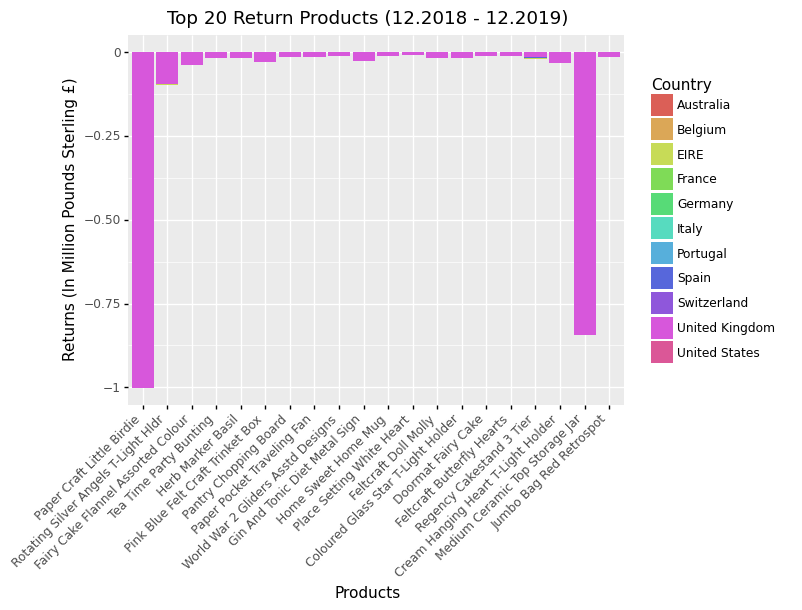

<ggplot: (127483024863)>

In [68]:
# graph top 20 return product with reoder product name base on revenue
(ggplot(data = product_return20,
        mapping = aes(x = "reorder(ProductName, Revenue)", y = "Revenue", fill = "Country"))
 + geom_col()
 + scale_x_discrete(position = "top")
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs(x = "Products",
        y = "Returns (In Million Pounds Sterling £)",
        title = "Top 20 Return Products (12.2018 - 12.2019)")
)

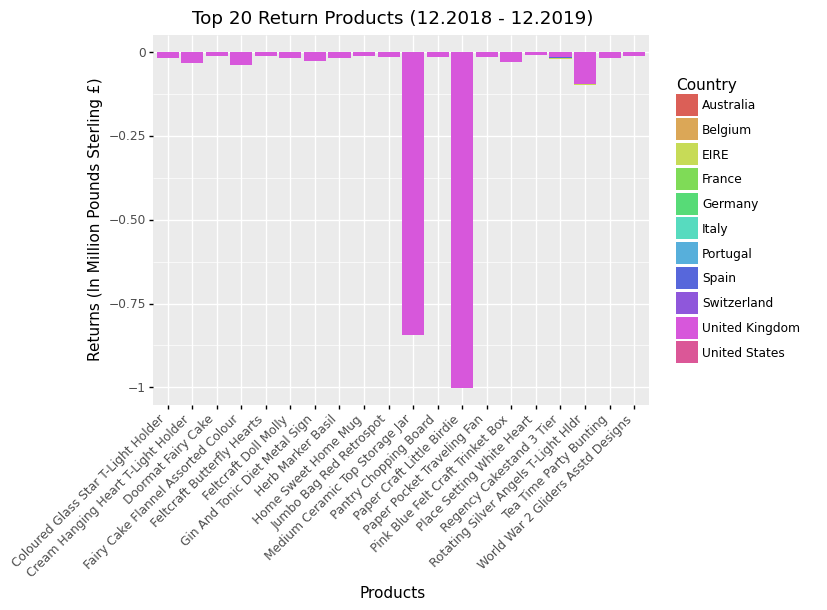

<ggplot: (147936568640)>

In [37]:
# graph top 20 return products without reorder function
(ggplot(product_return20)
  +aes(x = "ProductName", y = "Revenue", fill = "Country")
 + geom_col()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs(x = "Products",
        y = "Returns (In Million Pounds Sterling £)",
        title = "Top 20 Return Products (12.2018 - 12.2019)")
)

In [23]:
# the second largest return product
sales[sales["ProductName"] == "Medium Ceramic Top Storage Jar"]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
24,581476,2019-12-09,23166,Medium Ceramic Top Storage Jar,11.32,48,543.36,12433.0,Norway,2019,12
1260,581492,2019-12-09,23166,Medium Ceramic Top Storage Jar,12.77,2,25.54,15492.0,United Kingdom,2019,12
4982,581219,2019-12-08,23166,Medium Ceramic Top Storage Jar,12.77,1,12.77,16219.0,United Kingdom,2019,12
6410,581439,2019-12-08,23166,Medium Ceramic Top Storage Jar,12.77,2,25.54,15439.0,United Kingdom,2019,12
7161,581108,2019-12-07,23166,Medium Ceramic Top Storage Jar,11.53,2,23.06,15984.0,United Kingdom,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
350710,552953,2019-05-12,23166,Medium Ceramic Top Storage Jar,11.53,4,46.12,16745.0,United Kingdom,2019,5
351227,553005,2019-05-12,23166,Medium Ceramic Top Storage Jar,11.53,5,57.65,14651.0,United Kingdom,2019,5
351377,553009,2019-05-12,23166,Medium Ceramic Top Storage Jar,11.53,3,34.59,13601.0,United Kingdom,2019,5
473981,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,840113.80,12346.0,United Kingdom,2019,1


In [24]:
# a product in top 20 return
sales[sales['ProductName'] == "World War 2 Gliders Asstd Designs"]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
100,581478,2019-12-09,84077,World War 2 Gliders Asstd Designs,10.55,48,506.40,17364.0,United Kingdom,2019,12
708,581492,2019-12-09,84077,World War 2 Gliders Asstd Designs,10.90,1,10.90,15492.0,United Kingdom,2019,12
2791,581403,2019-12-08,84077,World War 2 Gliders Asstd Designs,10.55,48,506.40,13510.0,United Kingdom,2019,12
3380,581419,2019-12-08,84077,World War 2 Gliders Asstd Designs,10.47,288,3015.36,15484.0,United Kingdom,2019,12
6833,581018,2019-12-07,84077,World War 2 Gliders Asstd Designs,10.55,144,1519.20,13743.0,United Kingdom,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
530672,536876,2018-12-03,84077,World War 2 Gliders Asstd Designs,10.69,1,10.69,12876.0,Belgium,2018,12
531313,536615,2018-12-02,84077,World War 2 Gliders Asstd Designs,10.55,48,506.40,14047.0,United Kingdom,2018,12
531351,536618,2018-12-02,84077,World War 2 Gliders Asstd Designs,10.55,48,506.40,17017.0,United Kingdom,2018,12
532886,536830,2018-12-02,84077,World War 2 Gliders Asstd Designs,10.43,2880,30038.40,16754.0,United Kingdom,2018,12


In [20]:
# the biggest return product
product_return[product_return["ProductName"] == "Paper Craft Little Birdie"]

,ProductName,Country,Price,Quantity,Revenue,Year,Month
0,Paper Craft Little Birdie,United Kingdom,12.38,-80995,-1002718.1,2019,12


In [22]:
# the biggest return product in sales dataframe
sales[sales["ProductName"] == "Paper Craft Little Birdie"]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
144,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,1002718.1,16446.0,United Kingdom,2019,12
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,12.38,-80995,-1002718.1,16446.0,United Kingdom,2019,12


In [26]:
# the customer who made the biggest return
sales[sales['CustomerNo'] == 16446]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
144,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,1002718.10,16446.0,United Kingdom,2019,12
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,12.38,-80995,-1002718.10,16446.0,United Kingdom,2019,12
343091,553573,2019-05-18,22980,Pantry Scrubbing Brush,11.94,1,11.94,16446.0,United Kingdom,2019,5
343092,553573,2019-05-18,22982,Pantry Pastry Brush,11.53,1,11.53,16446.0,United Kingdom,2019,5


In [57]:
# Product return rate
100*sales[sales["Revenue"] <0].agg("sum")["Revenue"]/overview["Revenue"][0]

<ipython-input-57-7fbe04672b37>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


-5.060095995758252

#### Products: Correlation

In [24]:
# create a new dataframe
p1 = pd.DataFrame(columns = ['10001'])


In [16]:
# sorted product names by revenue
productName = sales.groupby("ProductName").sum().sort_values(by = ['Revenue'],ascending = False).reset_index()
productName[:60]

,ProductName,Price,Quantity,Revenue,CustomerNo
0,Popcorn Holder,16693.12,56450,630930.36,22590700.0
1,Jumbo Bag Red Retrospot,27592.51,47363,580004.88,32850114.0
2,World War 2 Gliders Asstd Designs,5734.78,53847,566033.00,8256723.0
3,Cream Hanging Heart T-Light Holder,32179.41,35378,464857.90,36849705.0
4,Assorted Colour Bird Ornament,18031.74,36445,434105.02,22823033.0
5,Pack Of 72 Retrospot Cake Cases,15265.14,36231,392984.52,20875305.0
6,Rabbit Night Light,13328.64,30680,382773.84,15687788.0
7,Regency Cakestand 3 Tier,53669.37,13033,302442.89,32858182.0
8,Mini Paint Set Vintage,4311.02,26437,288238.86,5732957.0
9,Party Bunting,27925.97,18040,285708.63,26432796.0


In [20]:
# create a dataframe of top 60 best seller in daily sales
for p in productName[:60]["ProductName"]:
    # dataframe of each products
    temp = pd.DataFrame({str(p):list(sales[sales["ProductName"] == str(p)]["Quantity"])})
    # concat all the dataframe (with diffirent length)
    product_sale = pd.concat([p1,temp],axis = 1)
    p1 = product_sale
    
product_sale


,10001,Popcorn Holder,Jumbo Bag Red Retrospot,World War 2 Gliders Asstd Designs,Cream Hanging Heart T-Light Holder,Assorted Colour Bird Ornament,Pack Of 72 Retrospot Cake Cases,Rabbit Night Light,Regency Cakestand 3 Tier,Mini Paint Set Vintage,...,Set Of 4 Pantry Jelly Moulds,Lunch Bag Apple Design,Girls Alphabet Iron On Patches,Hanging Heart Jar T-Light Holder,72 Sweetheart Fairy Cake Cases,Small Chinese Style Scissor,Lunch Bag Cars Blue,Asstd Design 3d Paper Stickers,Dolly Girl Lunch Box,Jumbo Bag Owls
0,NaN,100.0,10.0,48.0,1,16.0,2.0,24.0,10.0,36.0,...,12.0,3.0,31.0,4.0,24.0,60.0,1.0,32.0,1.0,10.0
1,NaN,4.0,5.0,1.0,3,16.0,7.0,18.0,8.0,36.0,...,12.0,3.0,50.0,-1.0,6.0,10.0,4.0,60.0,12.0,8.0
2,NaN,24.0,30.0,48.0,1,3.0,2.0,2.0,2.0,108.0,...,3.0,1.0,6.0,12.0,2.0,1.0,8.0,12540.0,12.0,20.0
3,NaN,34.0,30.0,288.0,2,8.0,3.0,24.0,6.0,36.0,...,2.0,10.0,16.0,2.0,2.0,60.0,3.0,1.0,1.0,100.0
4,NaN,68.0,10.0,144.0,4,16.0,4.0,12.0,3.0,3.0,...,12.0,10.0,22.0,6.0,1.0,2.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2374,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2375,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2376,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# calculate the correlation table
p_corr = product_sale.corr()
p_corr.dropna(axis = 1, how = "all", inplace = True)
p_corr.dropna(axis = 0, how = 'all', inplace = True)
p_corr.fillna(0, inplace = True)
p_corr

,Popcorn Holder,Jumbo Bag Red Retrospot,World War 2 Gliders Asstd Designs,Cream Hanging Heart T-Light Holder,Assorted Colour Bird Ornament,Pack Of 72 Retrospot Cake Cases,Rabbit Night Light,Regency Cakestand 3 Tier,Mini Paint Set Vintage,Party Bunting,...,Set Of 4 Pantry Jelly Moulds,Lunch Bag Apple Design,Girls Alphabet Iron On Patches,Hanging Heart Jar T-Light Holder,72 Sweetheart Fairy Cake Cases,Small Chinese Style Scissor,Lunch Bag Cars Blue,Asstd Design 3d Paper Stickers,Dolly Girl Lunch Box,Jumbo Bag Owls
Popcorn Holder,1.000000,0.000277,-0.022117,-0.003232,-0.008644,-0.011077,-0.015841,-0.000645,-0.054895,-0.038854,...,-0.003789,0.013443,-0.052053,-0.031782,0.012049,0.288905,-0.017264,-0.052069,0.014409,-0.033340
Jumbo Bag Red Retrospot,0.000277,1.000000,-0.012685,-0.002768,-0.006866,0.004033,0.016979,-0.021362,-0.000798,-0.008299,...,-0.017556,0.001760,0.005796,0.010213,-0.011075,-0.053928,0.036256,0.189363,-0.028695,-0.042858
World War 2 Gliders Asstd Designs,-0.022117,-0.012685,1.000000,-0.012306,-0.020583,-0.006823,0.006874,0.006653,-0.102552,0.061725,...,-0.031751,-0.029179,-0.013733,0.018819,0.009525,0.096799,0.030062,-0.021607,-0.008470,0.051756
Cream Hanging Heart T-Light Holder,-0.003232,-0.002768,-0.012306,1.000000,-0.001482,-0.023945,-0.020724,-0.038558,-0.038631,0.001735,...,-0.016780,-0.020419,-0.086819,0.000794,-0.014563,0.124523,0.004465,-0.107063,0.008276,-0.024923
Assorted Colour Bird Ornament,-0.008644,-0.006866,-0.020583,-0.001482,1.000000,-0.012853,0.000712,-0.015576,-0.036992,-0.027413,...,-0.018666,-0.003943,0.012025,0.019095,-0.020028,0.044663,-0.007700,-0.102865,-0.015345,0.054225
Pack Of 72 Retrospot Cake Cases,-0.011077,0.004033,-0.006823,-0.023945,-0.012853,1.000000,-0.013695,0.003538,-0.037004,0.022796,...,-0.013788,0.008205,-0.065042,0.061202,0.088980,-0.207226,-0.020282,-0.136627,0.071234,-0.008931
Rabbit Night Light,-0.015841,0.016979,0.006874,-0.020724,0.000712,-0.013695,1.000000,-0.014393,-0.037840,-0.016807,...,0.004114,0.001789,-0.035190,-0.022838,-0.013994,-0.087590,-0.115943,-0.125756,-0.014098,-0.004842
Regency Cakestand 3 Tier,-0.000645,-0.021362,0.006653,-0.038558,-0.015576,0.003538,-0.014393,1.000000,-0.028354,-0.005969,...,-0.015422,-0.041438,0.020157,0.011069,-0.021215,-0.047342,-0.063915,-0.051257,-0.009871,-0.037303
Mini Paint Set Vintage,-0.054895,-0.000798,-0.102552,-0.038631,-0.036992,-0.037004,-0.037840,-0.028354,1.000000,-0.002451,...,0.085011,-0.017342,0.011014,-0.049542,-0.026560,0.000021,0.044110,0.604839,-0.002533,-0.044393
Party Bunting,-0.038854,-0.008299,0.061725,0.001735,-0.027413,0.022796,-0.016807,-0.005969,-0.002451,1.000000,...,-0.004743,-0.002402,0.126870,0.023191,-0.009467,-0.058641,-0.000567,0.019245,-0.023337,0.004914


In [22]:

#calculate the absolute value of correlation coefficients that are greater than 0.3
corr = p_corr[abs(p_corr)>= 0.3]

corr

,Popcorn Holder,Jumbo Bag Red Retrospot,World War 2 Gliders Asstd Designs,Cream Hanging Heart T-Light Holder,Assorted Colour Bird Ornament,Pack Of 72 Retrospot Cake Cases,Rabbit Night Light,Regency Cakestand 3 Tier,Mini Paint Set Vintage,Party Bunting,...,Set Of 4 Pantry Jelly Moulds,Lunch Bag Apple Design,Girls Alphabet Iron On Patches,Hanging Heart Jar T-Light Holder,72 Sweetheart Fairy Cake Cases,Small Chinese Style Scissor,Lunch Bag Cars Blue,Asstd Design 3d Paper Stickers,Dolly Girl Lunch Box,Jumbo Bag Owls
Popcorn Holder,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jumbo Bag Red Retrospot,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World War 2 Gliders Asstd Designs,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cream Hanging Heart T-Light Holder,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assorted Colour Bird Ornament,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pack Of 72 Retrospot Cake Cases,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rabbit Night Light,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regency Cakestand 3 Tier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mini Paint Set Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604839,NaN,NaN
Party Bunting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


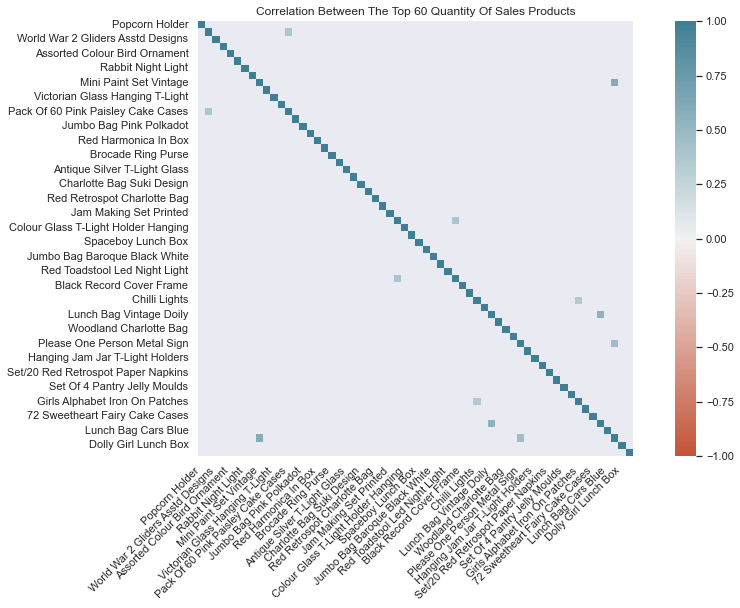

In [23]:
# correlation heat map

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Correlation Between The Top 60 Quantity Of Sales Products");

## Analysis 5: Customers

In [4]:
# sum of each customer
customer = sales.groupby(["CustomerNo","Country"]).sum().reset_index()
customer = customer.sort_values(by = ['Revenue'],ascending = False)
# convert revenue in million pounds sterling
customer["Revenue"] = customer["Revenue"]/1000000

customer["Revenue"] = customer["Revenue"].round(2)
customer

,CustomerNo,Country,Price,Quantity,Revenue,Year,Month
71730,14646.0,Netherlands,26235.36,197132,2.31,4171185,14081
174797,18102.0,United Kingdom,6406.97,64124,0.92,870171,3746
79544,14911.0,EIRE,79504.94,77059,0.92,11709890,47382
4788,12415.0,Australia,9888.11,77242,0.92,1566744,4670
155759,17450.0,United Kingdom,4670.73,69041,0.90,686457,2321
...,...,...,...,...,...,...,...
158685,17548.0,United Kingdom,208.66,-132,-0.00,34316,129
151351,17307.0,United Kingdom,11.34,-144,-0.00,2018,12
134859,16742.0,United Kingdom,644.57,-148,-0.00,76687,450
120457,16252.0,United Kingdom,283.99,-158,-0.00,42378,252


C:\Users\aladd\Anaconda3\lib\site-packages\plotnine\mapping\evaluation.py:151: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\aladd\Anaconda3\lib\site-packages\plotnine\mapping\evaluation.py:151: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars


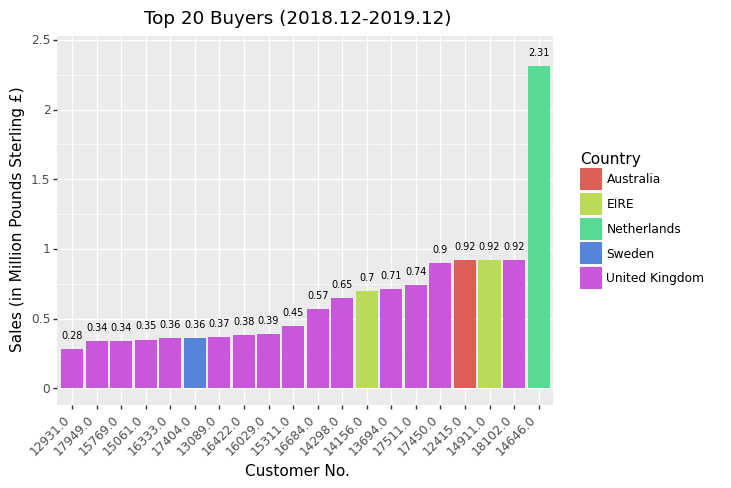

<ggplot: (170390880247)>

In [129]:
(ggplot(data = customer[:20],
        mapping = aes(y = 'Revenue', x = 'reorder(CustomerNo,Revenue)',fill = "Country",label = "Revenue"))
 + geom_col()
 + geom_text(size = 7, nudge_y=0.1)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs( x = "Customer No.",
         y = "Sales (in Million Pounds Sterling £)",
         title = "Top 20 Buyers (2018.12-2019.12)")

)

In [51]:
# one time purchase customers
one_time_purchase_customer = customerNo[(cutomerNo["Year"] == 2018) | (cutomerNo["Year"] == 2019)]
one_time_purchase_customer

,CustomerNo,Price,Quantity,Revenue,Year,Month
41,13256.0,10.25,12540,128535.00,2019,11
752,15195.0,13.07,1404,18350.28,2019,12
993,18133.0,10.96,1350,14796.00,2019,5
1993,16881.0,10.99,600,6594.00,2019,10
2191,17443.0,11.34,504,5715.36,2019,5
...,...,...,...,...,...,...
4721,16061.0,40.95,-1,-40.95,2019,3
4728,16579.0,12.86,-12,-154.32,2018,12
4729,18141.0,13.27,-12,-159.24,2018,12
4730,13829.0,18.96,-12,-227.52,2018,12


In [53]:
# percentage of one-time purchase customers
100*len(one_time_purchase_customer)/len(customerNo)

2.152807091599831

In [63]:
# the percentage of sale revenue of top 20% customers 
100*sum(customerNo["Revenue"][:int(0.2*len(customerNo))])/sum(customerNo["Revenue"])


72.2489026985634

In [44]:
# the biggest buyer 
c14646 = sales[sales["CustomerNo"]== 14646]

In [39]:
c14646

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
2338,581338,2019-12-08,23344,Jumbo Bag 50'S Christmas,12.08,140,1691.20,14646.0,Netherlands,2019,12
8272,581175,2019-12-07,22973,Children's Circus Parade Mug,11.74,48,563.52,14646.0,Netherlands,2019,12
8273,581175,2019-12-07,23280,Folding Butterfly Mirror Hot Pink,10.99,96,1055.04,14646.0,Netherlands,2019,12
8274,581175,2019-12-07,23281,Folding Butterfly Mirror Red,10.99,96,1055.04,14646.0,Netherlands,2019,12
8275,581175,2019-12-07,23498,Classic Bicycle Clips,11.53,72,830.16,14646.0,Netherlands,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
497141,539491,2018-12-20,47599A,Pink Party Bags,12.40,2,24.80,14646.0,Netherlands,2018,12
497142,539491,2018-12-20,22331,Woodland Party Bag + Sticker Set,11.94,2,23.88,14646.0,Netherlands,2018,12
497143,539491,2018-12-20,22333,Retrospot Party Bag + Sticker Set,11.94,2,23.88,14646.0,Netherlands,2018,12
497144,539491,2018-12-20,22315,200 Red + White Bendy Straws,11.53,1,11.53,14646.0,Netherlands,2018,12


<br>